In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import json

In [ ]:
with open('drop_dataset_train.json') as json_file:
    dataset = json.load(json_file)
with open('passage_text.json') as json_file:
    passage_text = json.load(json_file)
with open('passage_type.json') as json_file:
    passage_type = json.load(json_file)
with open('question_answer_text.json') as json_file:
    question_answer_text = json.load(json_file)
with open('question_answer_type.json') as json_file:
    question_answer_type = json.load(json_file)
    #print(json_file)

In [4]:
# Overall Review:
count = 0 #for debug

q_type = {'numbers':0,'spans':0,'date':0 } # question type

spans_count = {'mis_spans':0,'not_found':0,'partially_found':0,'found':0} # spans found in text


for key,item in passage_type.items():
    for question in question_answer_type[key]:
        if len(question["answer"][0])==0:
            q_type["spans"] += 1
            spans_count["mis_spans"] += 1
        elif len(question["answer"][0])==1:
            q_type["spans"] += 1
            if question["answer"][0][0] in item or question["answer"][0][0] in question["question"]:
                spans_count['found'] += 1
            else:
                spans_count['not_found'] += 1
        elif question["answer"][0][1] == "number":
            q_type["numbers"] += 1
        elif question["answer"][0][1] == "date":
            q_type["date"] += 1
        else:
            q_type["spans"] += 1
            found = True
            partially_found = False
            for keyword in question["answer"][0]:
                if keyword not in item and keyword not in question["question"]:
                    found = False
                else:
                    partially_found = True
            if found:
                spans_count["found"] += 1
            elif partially_found:
                spans_count["partially_found"] += 1
            else:
                 spans_count["not_found"] += 1

In [5]:
q_type = dict(sorted(q_type.items(), key=lambda item: -item[1]))
q_type

{'numbers': 46970, 'spans': 29193, 'date': 1241}

/Applications/Coding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


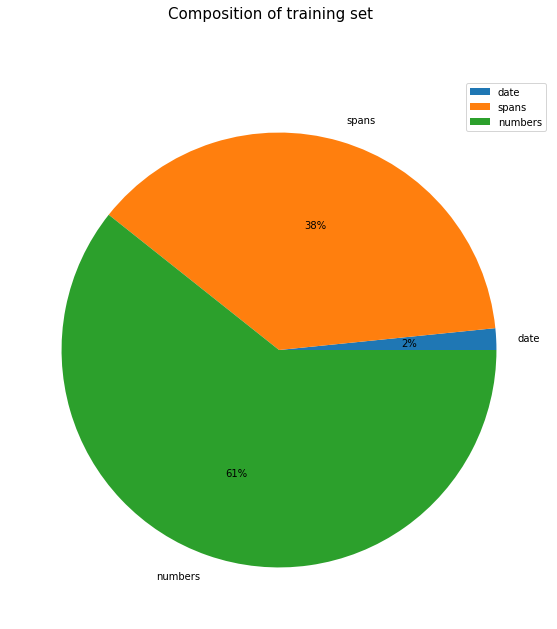

In [10]:
title = "Composition of training set"
D = q_type
D = dict(sorted(D.items(), key=lambda item: item[1]))
nump = len(D)
x_data = list(D.values())
y_label = list(D.keys())
plt.pie(x_data[0:nump],labels = y_label[0:nump],autopct='%1.0f%%')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
fig.suptitle(title, fontsize = 15)
fig.show()
fig.savefig(title + '.png')

In [7]:
spans_count = dict(sorted(spans_count.items(), key=lambda item: -item[1]))
spans_count

{'found': 16808, 'mis_spans': 7146, 'not_found': 4842, 'partially_found': 397}

/Applications/Coding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


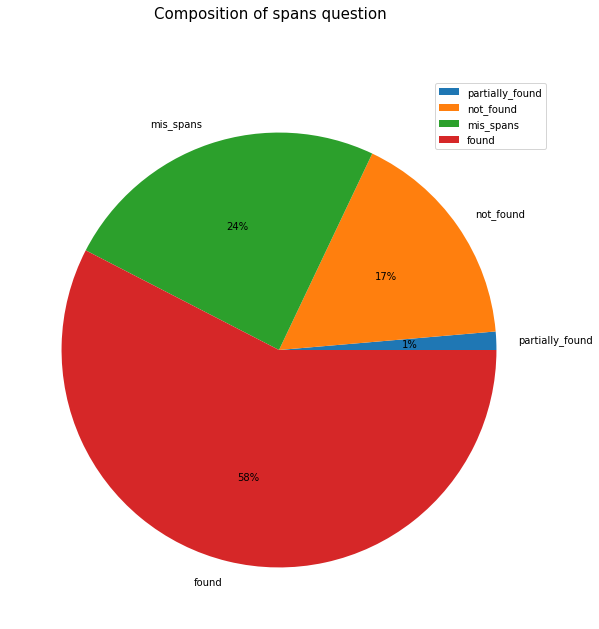

In [11]:
title = "Composition of spans question"
D = spans_count
D = dict(sorted(D.items(), key=lambda item: item[1]))
nump = len(D)
x_data = list(D.values())
y_label = list(D.keys())
plt.pie(x_data[0:nump],labels = y_label[0:nump],autopct='%1.0f%%')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)
fig.suptitle(title, fontsize = 15)
fig.show()
fig.savefig(title + '.png')

In [11]:
print("type of question:")
for key,item in q_type.items():
    print('{0}:{1}'.format(key,item))
print("="*100)
print("type of spans:")
for key,item in spans_count.items():
    print('{0} : {1}'.format(key,item))
print("="*100)
print("spans_found_in_passage/total: %.2f"  %(spans_count["found"]/q_type["spans"]))
print("spans_partially_found_in_passage/total: %.2f"  %(spans_count["partially_found"]/(q_type["spans"])))
print("mis_spans_in_passage/total: %.2f"  %(spans_count["mis_spans"]/(q_type["spans"])))
print("spans_not_found_in_passage/total: %.2f"  %(spans_count["not_found"]/(q_type["spans"])))
print("spans_found_in_passage/total founded: %.2f"  %(spans_count["found"]/(q_type["spans"]-spans_count["mis_spans"])))

type of question:
numbers:46970
spans:29193
date:1241
type of spans:
found : 16808
mis_spans : 7146
not_found : 4842
partially_found : 397
spans_found_in_passage/total: 0.58
spans_partially_found_in_passage/total: 0.01
mis_spans_in_passage/total: 0.24
spans_not_found_in_passage/total: 0.17
spans_found_in_passage/total founded: 0.76


In [12]:
# Question vs Answer
number_keyword = {'none': 0}
date_keyword = {'none': 0}
spans_keyword = {'none': 0}
for key,passage in question_answer_type.items():
    for question in passage:
        question_text = question["question"]
        #answer = question["answer"]
        if len(question["answer"][0])==0:
            spans_keyword["none"] += 1 
        elif len(question["answer"][0])==1:
            if len(question_text) == 0:
                spans_keyword['none'] += 1
            else:
                for keyword in question_text:
                    key2 = str(keyword[1])
                    key4 = str(question["answer"][0][0][1])
                    key3 = key4 + "," + key2                    
                    if key3 not in spans_keyword.keys():
                        spans_keyword[key3] = 1
                    else:
                        spans_keyword[key3] += 1   
        elif question["answer"][0][1] == "number":
            if len(question_text) == 0:
                number_keyword['none'] += 1
            else:
                for keyword in question_text:
                    key2 = str(keyword[1])
                    key3 = "NUMBER," + key2
                    if key3 not in number_keyword.keys():
                        number_keyword[key3] = 1
                    else:
                        number_keyword[key3] += 1
        elif question["answer"][0][1] == "date": 
            if len(question_text) == 0:
                date_keyword['none'] += 1
            else:
                for keyword in question_text:
                    key2 = str(keyword[1])
                    key3 = "DATE," + key2
                    if key3 not in date_keyword.keys():
                        date_keyword[key3] = 1
                    else:
                        date_keyword[key3] += 1 
        else:
            if len(question_text) == 0:
                spans_keyword['none'] += 1
            else:
                for keyword in question_text:
                    key2 = str(keyword[1])
                    for answer in question["answer"][0]:
                        key4 = str(answer[1])
                        key3 = key4 + "," + key2
                        if key3 not in spans_keyword.keys():
                            spans_keyword[key3] = 1
                        else:
                            spans_keyword[key3] += 1  
        break

In [13]:
number_keyword = dict(sorted(number_keyword.items(), key=lambda item: -item[1]))
number_keyword

{'NUMBER,PERSON': 1063,
 'NUMBER,DATE': 894,
 'NUMBER,ORG': 866,
 'none': 636,
 'NUMBER,GPE': 580,
 'NUMBER,NORP': 316,
 'NUMBER,ORDINAL': 309,
 'NUMBER,CARDINAL': 230,
 'NUMBER,EVENT': 112,
 'NUMBER,LOC': 84,
 'NUMBER,QUANTITY': 69,
 'NUMBER,FAC': 44,
 'NUMBER,LAW': 32,
 'NUMBER,MONEY': 32,
 'NUMBER,PERCENT': 28,
 'NUMBER,PRODUCT': 28,
 'NUMBER,WORK_OF_ART': 17,
 'NUMBER,LANGUAGE': 14,
 'NUMBER,TIME': 6}

In [14]:
date_keyword = dict(sorted(date_keyword.items(), key=lambda item: -item[1]))
date_keyword

{'DATE,DATE': 148,
 'DATE,GPE': 63,
 'DATE,PERSON': 56,
 'DATE,CARDINAL': 21,
 'DATE,ORG': 21,
 'DATE,NORP': 20,
 'DATE,ORDINAL': 19,
 'DATE,EVENT': 15,
 'none': 8,
 'DATE,LOC': 7,
 'DATE,WORK_OF_ART': 4,
 'DATE,PRODUCT': 3,
 'DATE,LAW': 3,
 'DATE,FAC': 2,
 'DATE,PERCENT': 2,
 'DATE,LANGUAGE': 1}

In [15]:
spans_keyword = dict(sorted(spans_keyword.items(), key=lambda item: -item[1]))
spans_keyword

{'none': 966,
 'PERSON,PERSON': 275,
 'PERSON,ORDINAL': 239,
 'GPE,GPE': 146,
 'ORG,ORG': 119,
 'PERSON,ORG': 99,
 'DATE,DATE': 86,
 'NORP,NORP': 82,
 'PERSON,GPE': 72,
 'GPE,ORDINAL': 69,
 'ORG,ORDINAL': 66,
 'PERSON,DATE': 60,
 'PERSON,CARDINAL': 57,
 'PERSON,QUANTITY': 45,
 'PERSON,NORP': 41,
 'ORG,DATE': 40,
 'GPE,DATE': 34,
 'GPE,PERSON': 33,
 'NORP,ORDINAL': 33,
 'NORP,GPE': 31,
 'GPE,NORP': 31,
 'DATE,PERSON': 29,
 'ORDINAL,ORDINAL': 29,
 'CARDINAL,DATE': 27,
 'CARDINAL,PERSON': 26,
 'CARDINAL,ORG': 25,
 'GPE,ORG': 25,
 'DATE,ORG': 24,
 'ORG,PERSON': 22,
 'DATE,GPE': 22,
 'NORP,PERSON': 21,
 'GPE,CARDINAL': 20,
 'ORG,GPE': 20,
 'CARDINAL,CARDINAL': 19,
 'ORG,CARDINAL': 17,
 'NORP,DATE': 17,
 'CARDINAL,GPE': 15,
 'CARDINAL,ORDINAL': 14,
 'ORDINAL,DATE': 14,
 'NORP,ORG': 13,
 'QUANTITY,PERSON': 13,
 'DATE,ORDINAL': 13,
 'LOC,LOC': 12,
 'EVENT,EVENT': 11,
 'ORDINAL,PERSON': 11,
 'PERSON,EVENT': 10,
 'NORP,CARDINAL': 10,
 'NORP,EVENT': 9,
 'DATE,NORP': 9,
 'ORG,EVENT': 9,
 'FAC,FAC'

/Applications/Coding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


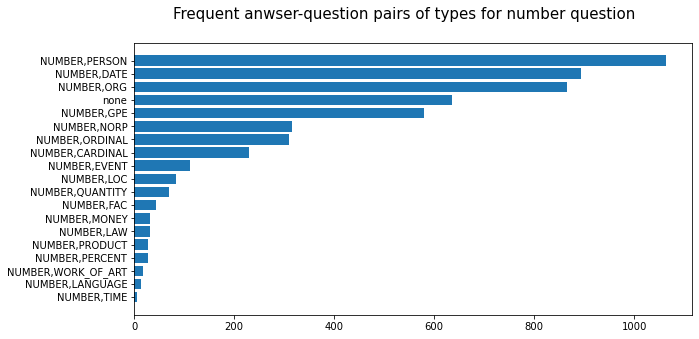

In [16]:
title = "Frequent anwser-question pairs of types for number question"
D = number_keyword
D = dict(sorted(D.items(), key=lambda item: item[1]))
nump = min(20,len(D))
plt.barh(range(nump), list(D.values()), align='center')
plt.yticks(range(nump), list(D.keys()))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 5)
fig.suptitle(title, fontsize = 15)
fig.show()
fig.savefig(title + '.png')

/Applications/Coding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


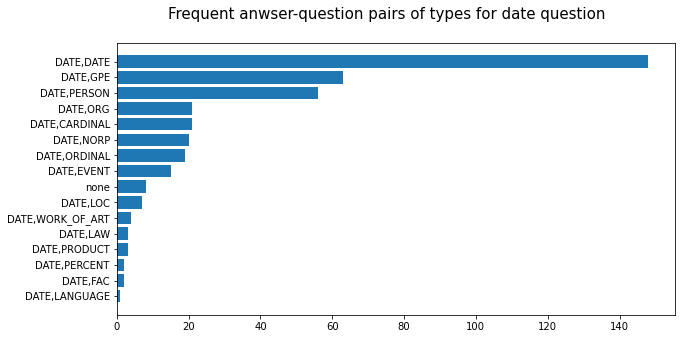

In [86]:
title = "Frequent anwser-question pairs of types for date question"
D = date_keyword
D = dict(sorted(D.items(), key=lambda item: item[1]))
nump = min(20,len(D))
plt.barh(range(nump), list(D.values()), align='center')
plt.yticks(range(nump), list(D.keys()))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 5)
fig.suptitle(title, fontsize = 15)
fig.show()
fig.savefig(title + '.png')

/Applications/Coding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


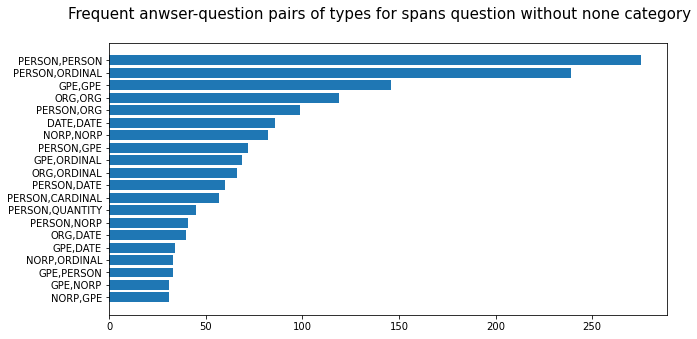

In [87]:
title = "Frequent anwser-question pairs of types for spans question without none category"
D = spans_keyword
D = dict(sorted(D.items(), key=lambda item: item[1]))
nump = min(20,len(D))
x_data = list(D.values())[(len(D)-nump-1):(len(D)-1)]
y_label = list(D.keys())[(len(D)-nump-1):(len(D)-1)]
plt.barh(range(nump),x_data , align='center')
plt.yticks(range(nump),y_label)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 5)
fig.suptitle(title, fontsize = 15)
fig.show()
fig.savefig(title + '.png')

In [ ]:
title = "Composition of anwser-question pairs of types for spans question"
D = spans_keyword
D = dict(sorted(D.items(), key=lambda item: item[1]))
nump = len(D)
x_data = list(D.values())[0:len(D)-1]
y_label = list(D.keys())[0:len(D)-1]
plt.pie(x_data[0:nump],labels = y_label[0:nump],autopct='%1.0f%%')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)
fig.suptitle(title, fontsize = 50)
fig.show()
fig.savefig(title + '.png')